In [95]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [18]:
data = pd.read_csv('CaliforniaHousePrices.csv')
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [19]:
data = data.drop(['ocean_proximity', 'longitude', 'latitude'], axis=1)
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100
20636,18,697,150.0,356,114,2.5568,77100
20637,17,2254,485.0,1007,433,1.7000,92300
20638,18,1860,409.0,741,349,1.8672,84700


In [20]:
data.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [127]:
X = data.drop(['median_house_value', 'population', 'total_bedrooms'], axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31337)


# Looking at the distribution of the data

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>]], dtype=object)

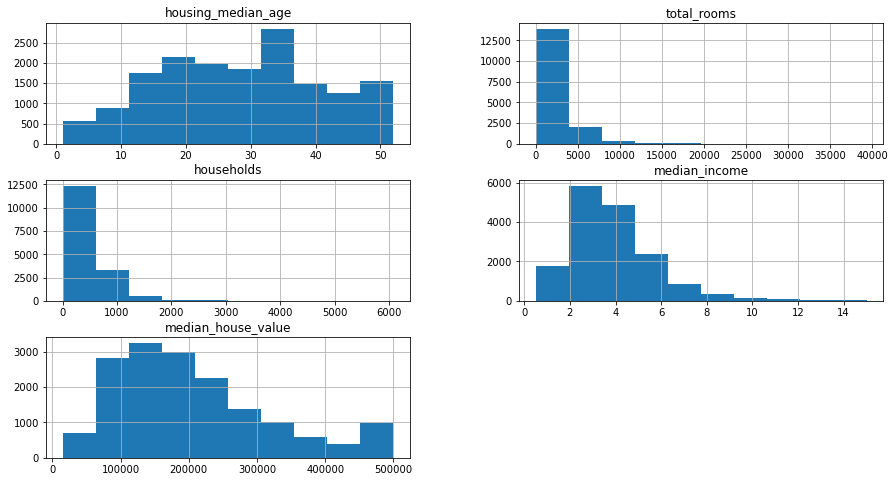

In [128]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(15,8))

In [129]:
#Doing log transformations because the data is not normally distributed
train_data['total_rooms'] = np.log(train_data['total_rooms'])
# train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'])
# train_data['population'] = np.log(train_data['population'])
train_data['households'] = np.log(train_data['households'])
train_data['median_income'] = np.log(train_data['median_income'])

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

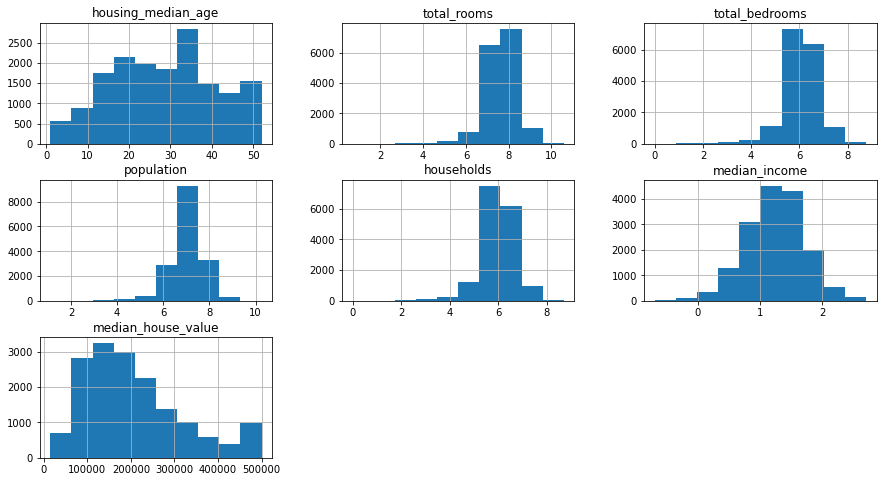

In [60]:
train_data.hist(figsize=(15,8))

# Linear Regression

In [139]:
linRegModel = LinearRegression()



#Fitting our model to our testing/training data
linRegModel.fit(X_train, y_train)

LinearRegression()

In [140]:
for coef in linRegModel.coef_:
    print("coefficient: " + str(coef))
    
print("Model  intercept: " + str(linRegModel.intercept_))

coefficient: 1888.7293678178878
coefficient: -18.965392438418583
coefficient: 134.71878504814214
coefficient: 47109.1377081263
Model  intercept: -46549.67117455165


In [141]:
train_pred = linRegModel.predict(X_train)
test_pred = linRegModel.predict(X_test)

In [151]:
#Model performance
lr_train_mse = mean_squared_error(y_train, train_pred)
lr_test_mse = mean_squared_error(y_test, test_pred)

lr_train_r2 = r2_score(y_train, train_pred)
lr_test_r2 = r2_score(y_test, test_pred)

print ('LR MSE (Training data):', lr_train_mse )
print ('LR MSE (Testing data):', lr_test_mse)
print ('LR R2 (Training data):', lr_train_r2)
print ('LR R2 (Testing data):', lr_test_r2)

lr_results = ['Linear Regression',lr_train_mse,lr_test_mse,lr_train_r2,lr_test_r2]

LR MSE (Training data): 6187788041.182178
LR MSE (Testing data): 6076476234.94016
LR R2 (Training data): 0.5361299789896745
LR R2 (Testing data): 0.5416939511545447


In [143]:
linRegModel.score(X_test, y_test)

0.5416939511545447

# Random Forest Regression

In [144]:
rfModel = RandomForestRegressor(max_depth=2, random_state=100)
rfModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [145]:
rf_train_pred = rfModel.predict(X_train)
rf_test_pred = rfModel.predict(X_test)

In [152]:
#Model performance
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print ('RF MSE (Training data):', rf_train_mse )
print ('RF MSE (Testing data):', rf_test_mse)
print ('RF R2 (Training data):', rf_train_r2)
print ('RF R2 (Testing data):', rf_test_r2)
rf_results = ['Random Forest Regression',rf_train_mse,rf_test_mse,rf_train_r2,rf_test_r2]

RF MSE (Training data): 7165759828.777231
RF MSE (Testing data): 7028846697.812264
RF R2 (Training data): 0.46281593031186086
RF R2 (Testing data): 0.4698633165893573


In [168]:
table = pd.DataFrame([lr_results, rf_results])
table.columns = ['Method', 'Training MSE', 'Testing MSE', 'Training r^2', 'Testing r^2']
table

,Method,Training MSE,Testing MSE,Training r^2,Testing r^2
0,Linear Regression,6.187788e+09,6.076476e+09,0.536130,0.541694
1,Random Forest Regression,7.165760e+09,7.028847e+09,0.462816,0.469863
